# Cracked Surface Detection using InceptionV3 Architecture
 
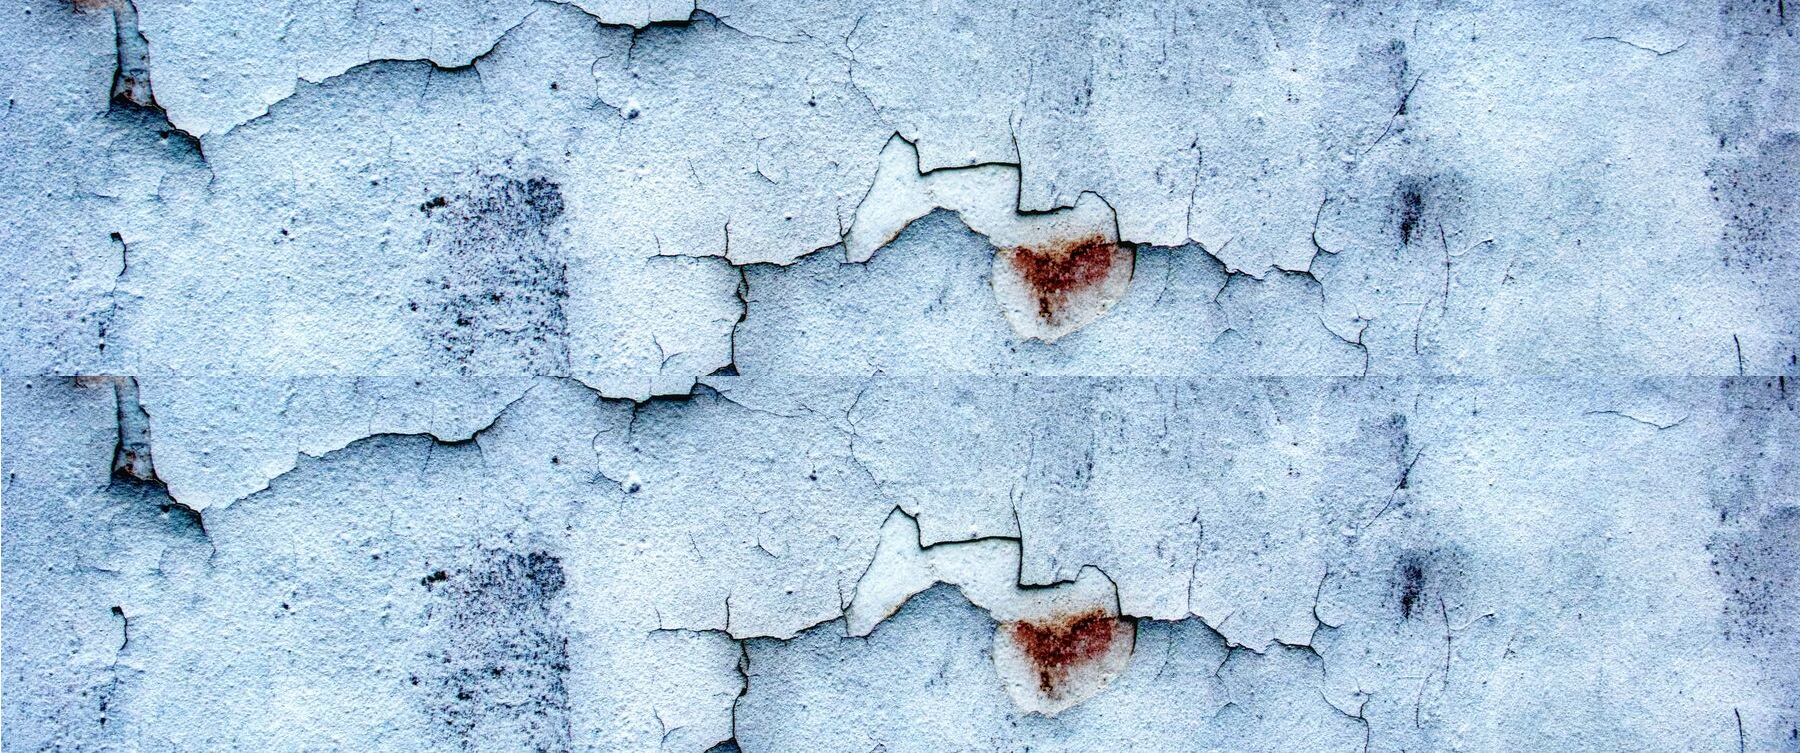


In [1]:
import numpy as np 
import pandas as pd 
import os
import os

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model,layers
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

import load_image

# Preparing the Dataset

# Samples of Cracked Surface

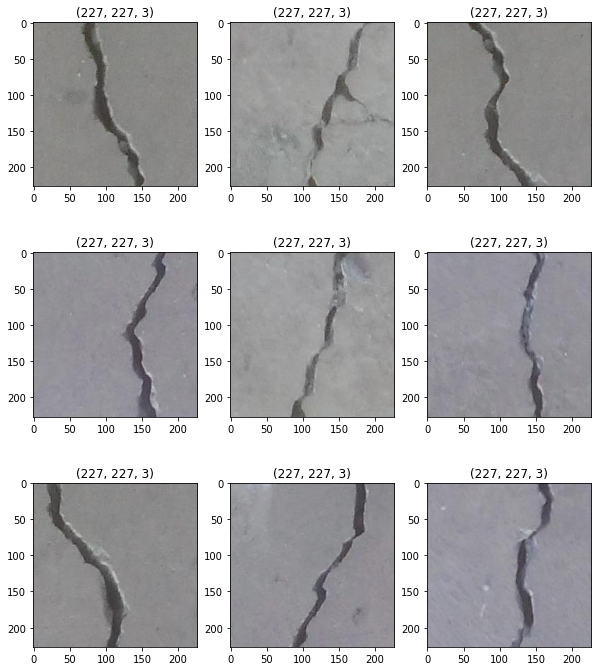

In [10]:
load_image.load_images_from_folder("C:/Users/KIIT/Desktop/66 Days of Data/Day21/dataset/Positive")

# Sample of Good Surface

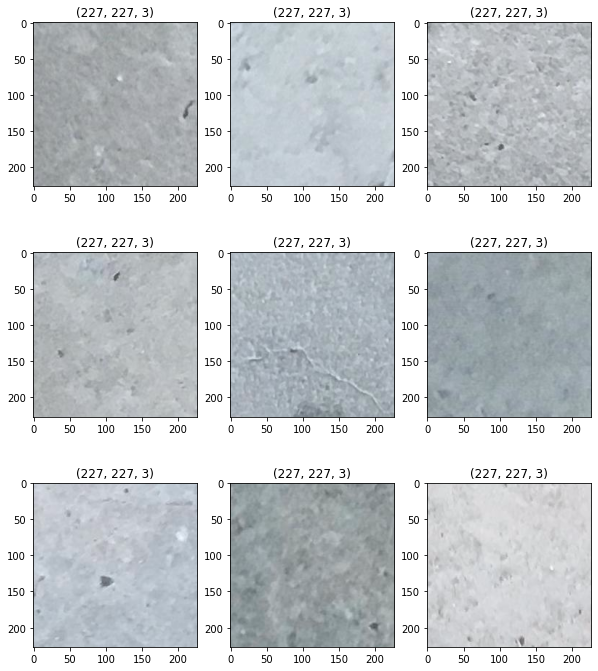

In [11]:
load_image.load_images_from_folder("C:/Users/KIIT/Desktop/66 Days of Data/Day21/dataset/Negative")

# InceptionV3 architecture building 

In [12]:
 
from tensorflow.keras.applications.inception_v3 import InceptionV3


pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

for layer in pre_trained_model.layers:
     layer.trainable = False

In [13]:

last_layer = pre_trained_model.get_layer('mixed7') 
last_output = last_layer.output



x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
    
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

## making Train dataset

In [14]:

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory('C:/Users/KIIT/Desktop/66 Days of Data/Day21/dataset',
                                                     target_size=(150,150),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training')            


Found 28000 images belonging to 2 classes.


## making Validation dataset

In [15]:
validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

validation_generator =  validation_datagen.flow_from_directory('C:/Users/KIIT/Desktop/66 Days of Data/Day21/dataset',
                                                                target_size=(150,150),
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                subset='validation')          
                                       

Found 12000 images belonging to 2 classes.


## Fitting the Model

In [16]:


history = model.fit_generator(train_generator,
            validation_data = validation_generator,
            epochs = 10,
            verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
438/438 [==============================] - ETA: 0s - loss: 0.6365 - accuracy: 0.8793WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002A291609A60> and will run it as-is.
Please report this to the TensorFlow team. When filing

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting Accuracy and Val_Accuracy

In [18]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.history['accuracy'], name='Actual Value',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(x=history.history['val_accuracy'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=5)))

# Plotting Loss and Val_Loss

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.history['loss'], name='Actual Value',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(x=history.history['val_loss'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=5)))

# Accuarcy

In [24]:
accuracy = acc[-1]
print("Accuracy : ",accuracy)

Accuracy :  0.9602142701148987


# This Model can Successfully Classify Whether a Surface is Cracked or Not with an Accuracy of 90%